In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.append('..')
# Define transformations for data augmentation or normalization
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Download the CIFAR-10 training dataset
train_dataset = torchvision.datasets.CIFAR10(
    root='./data',  # Directory where data will be stored
    train=True,     # Load training set
    download=True,  # Download the dataset if not available
    transform=transform  # Apply transformations
)

# Download the CIFAR-10 test dataset
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,  # Load test set
    download=True,
    transform=transform
)

# Create DataLoaders for batching and shuffling
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=True, num_workers=2
)

# Check dataset information
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Classes: {train_dataset.classes}")

Files already downloaded and verified
Files already downloaded and verified
Number of training samples: 50000
Number of test samples: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
classes_dict = dict(zip(range(len(train_dataset.classes)), train_dataset.classes))
classes_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Image batch dimensions: torch.Size([64, 3, 32, 32])
Image label dimensions: torch.Size([64])


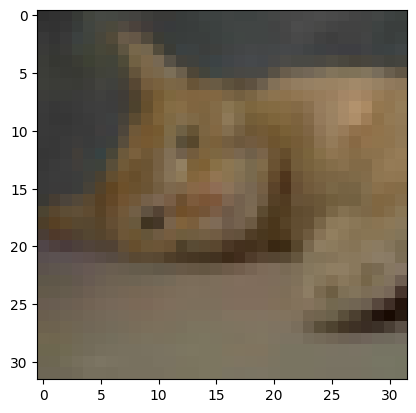

Label: cat


In [4]:

for image, label in train_loader:
    print("Image batch dimensions:", image.shape)
    print("Image label dimensions:", label.shape)
    imshow(image[0])
    print("Label:", classes_dict[label[0].item()])
    break

In [5]:
import torch.nn as nn
import timm


class CustomENet(nn.Module):
    def __init__(self, num_classes):
        super(CustomENet, self).__init__()
        self.model = timm.create_model("efficientnet_b0", pretrained=True)
        in_features = self.model.classifier.in_features
        self.model.classifier = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

In [6]:
from training import train_model


model = CustomENet(num_classes=len(train_dataset.classes))

In [7]:
train = 0

if train:
    train_model(
        model=model,
        train_loader=train_loader,
        criterion=nn.CrossEntropyLoss(),
        optimizer=torch.optim.Adam(model.parameters(), lr=0.001),
        num_epochs=3
    )
else:
    model.load_state_dict(torch.load(f"{type(model).__name__}_epoch_3.pth"))

In [8]:
from evaluation import evaluate_model


evaluate_model(model, test_loader)

Evaluating: 100%|██████████| 157/157 [00:39<00:00,  3.93it/s, current_acc=82.72%]

Final Accuracy: 82.72%


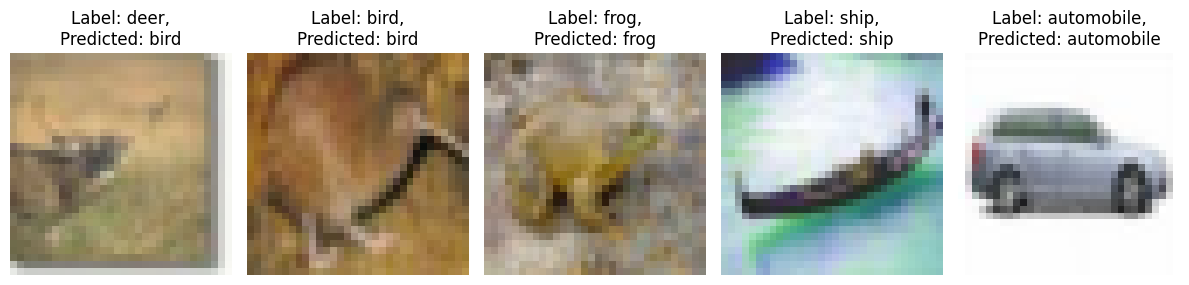

In [9]:
from vision import display_model_predictions


display_model_predictions(model, test_loader, classes_dict=classes_dict)

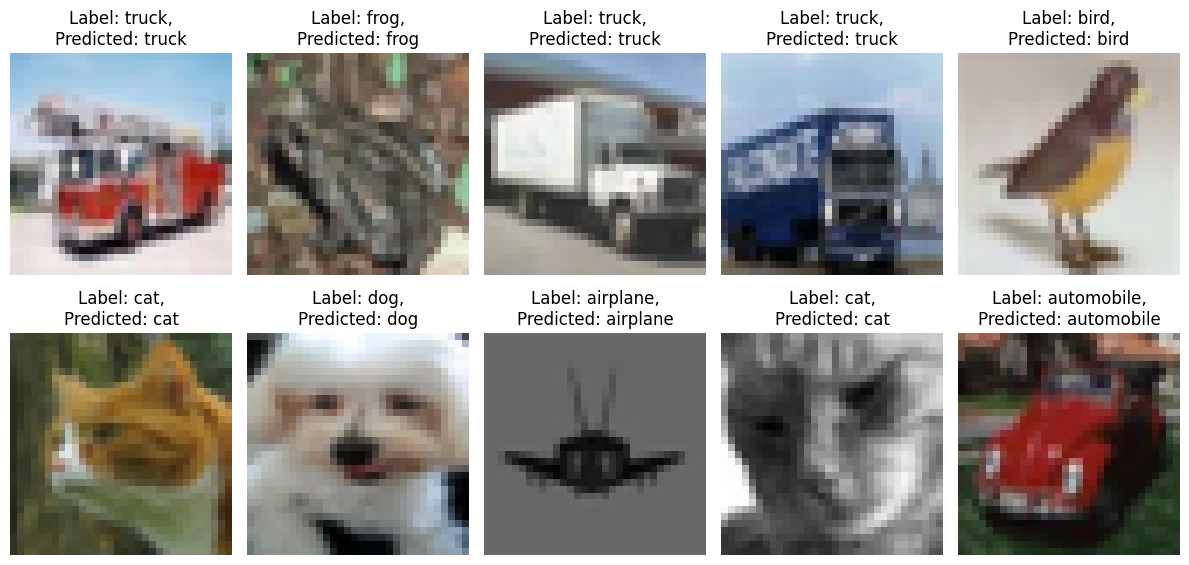

In [10]:
display_model_predictions(model, test_loader, classes_dict=classes_dict, num_images=10)